# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

## Import Statements

In [148]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product


# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
dfs = {
    'df_hh_income': df_hh_income,
    'df_pct_poverty': df_pct_poverty,
    'df_pct_completed_hs': df_pct_completed_hs,
    'df_share_race_city': df_share_race_city,
    'df_fatalities': df_fatalities
}
for df_name, df in dfs.items():
  print(f"Shape of {df_name}: {df.shape}")

Shape of df_hh_income: (29322, 3)
Shape of df_pct_poverty: (29329, 3)
Shape of df_pct_completed_hs: (29329, 3)
Shape of df_share_race_city: (29268, 7)
Shape of df_fatalities: (2535, 14)


In [6]:
for df_name, df in dfs.items():
  print(f"Columns of {df_name}: {df.columns}")

Columns of df_hh_income: Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Columns of df_pct_poverty: Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Columns of df_pct_completed_hs: Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Columns of df_share_race_city: Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Columns of df_fatalities: Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [7]:
for df_name, df in dfs.items():
  if df.isna().any().any():
    print(f"There are NaN values in {df_name}.")
  if df.duplicated().any():
    print(f"There are duplicated values in {df_name}.")

There are NaN values in df_hh_income.
There are NaN values in df_fatalities.


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [8]:
df_hh_income['Median Income'] = pd.to_numeric(df_hh_income['Median Income'], errors='coerce')
df_hh_income.dropna(inplace=True)

In [9]:
df_pct_poverty['state'] =  df_pct_poverty['Geographic Area'].value_counts()
df_fatalities.isna().sum()

,0
id,0
name,0
date,0
manner_of_death,0
armed,9
age,77
gender,0
race,195
city,0
state,0


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [10]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
df_pct_poverty.dropna(subset=['Geographic Area'], inplace=True)
df_pct_poverty['Geographic Area'] = df_pct_poverty['Geographic Area'].fillna('')
poverty_rate = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False).reset_index()
poverty_rate

,Geographic Area,poverty_rate
0,MS,26.88
1,AZ,25.67
2,GA,23.78
3,NM,23.08
4,AR,22.96
5,LA,22.34
6,SC,22.16
7,WV,21.13
8,OK,20.66
9,AL,20.65


In [11]:
bar = px.bar(x=poverty_rate['Geographic Area'], y=poverty_rate['poverty_rate'])
bar.update_layout(xaxis_title="State Name", yaxis_title="Precentage of Poverty in the State")
bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [12]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')
df_pct_completed_hs.dropna(subset=['Geographic Area'], inplace=True)
df_pct_completed_hs['Geographic Area'] = df_pct_completed_hs['Geographic Area'].fillna('')
finished_high_school_rate = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values(ascending=True).reset_index()
finished_high_school_rate

,Geographic Area,percent_completed_hs
0,TX,75.69
1,MS,78.47
2,GA,79.01
3,LA,79.29
4,AR,79.95
5,AL,80.30
6,AZ,80.47
7,SC,80.85
8,NM,80.98
9,TN,81.63


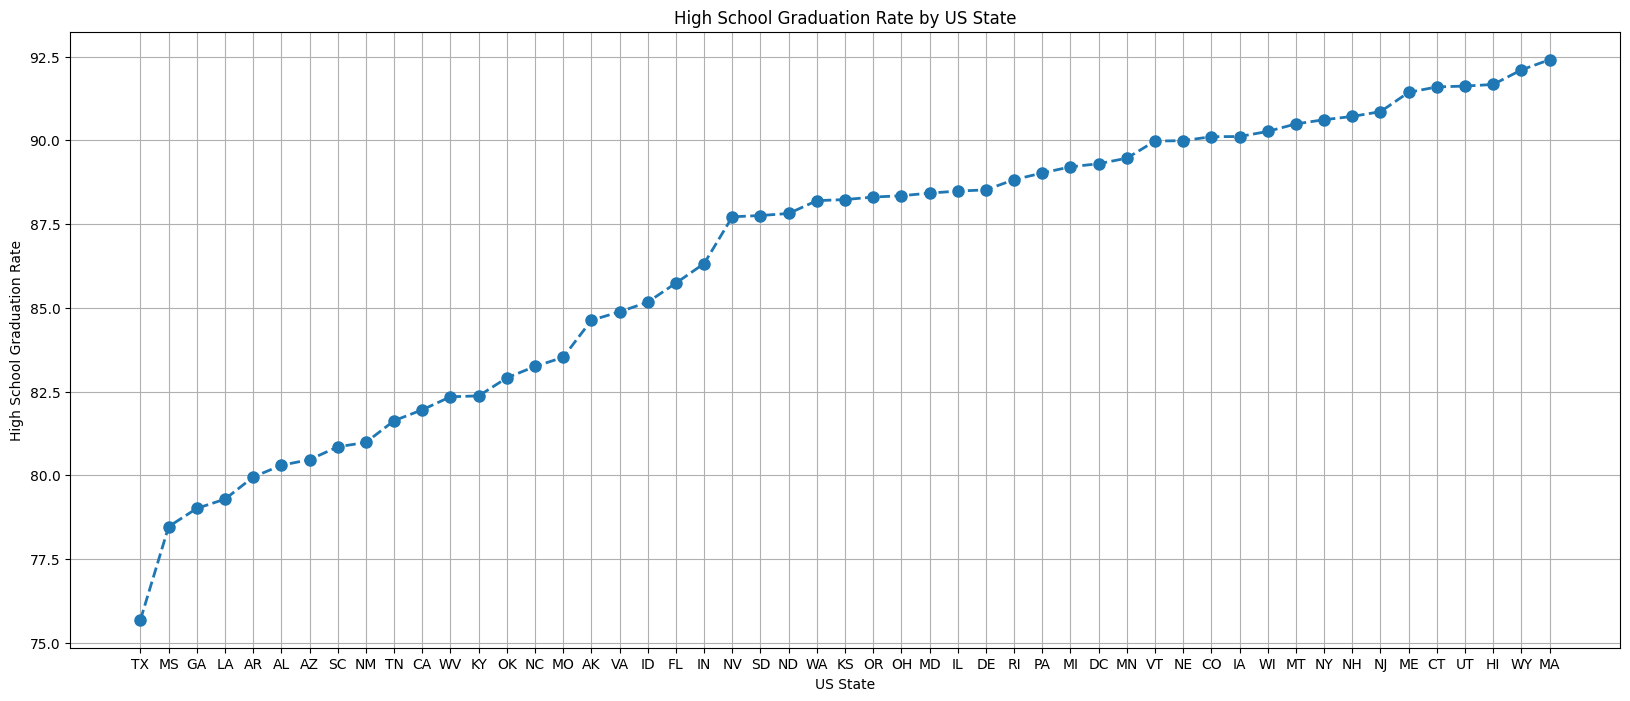

In [13]:
plt.figure(figsize=(20, 8))
plt.plot(finished_high_school_rate['Geographic Area'], finished_high_school_rate['percent_completed_hs'], linestyle='--', marker='o', markersize=8, linewidth=2)
plt.xlabel("US State")
plt.ylabel("High School Graduation Rate")
plt.title("High School Graduation Rate by US State")
plt.grid(True)
plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [14]:
merged_df = poverty_rate.merge(finished_high_school_rate, on='Geographic Area')
merged_df.sort_values('percent_completed_hs', ascending=False, inplace=True)

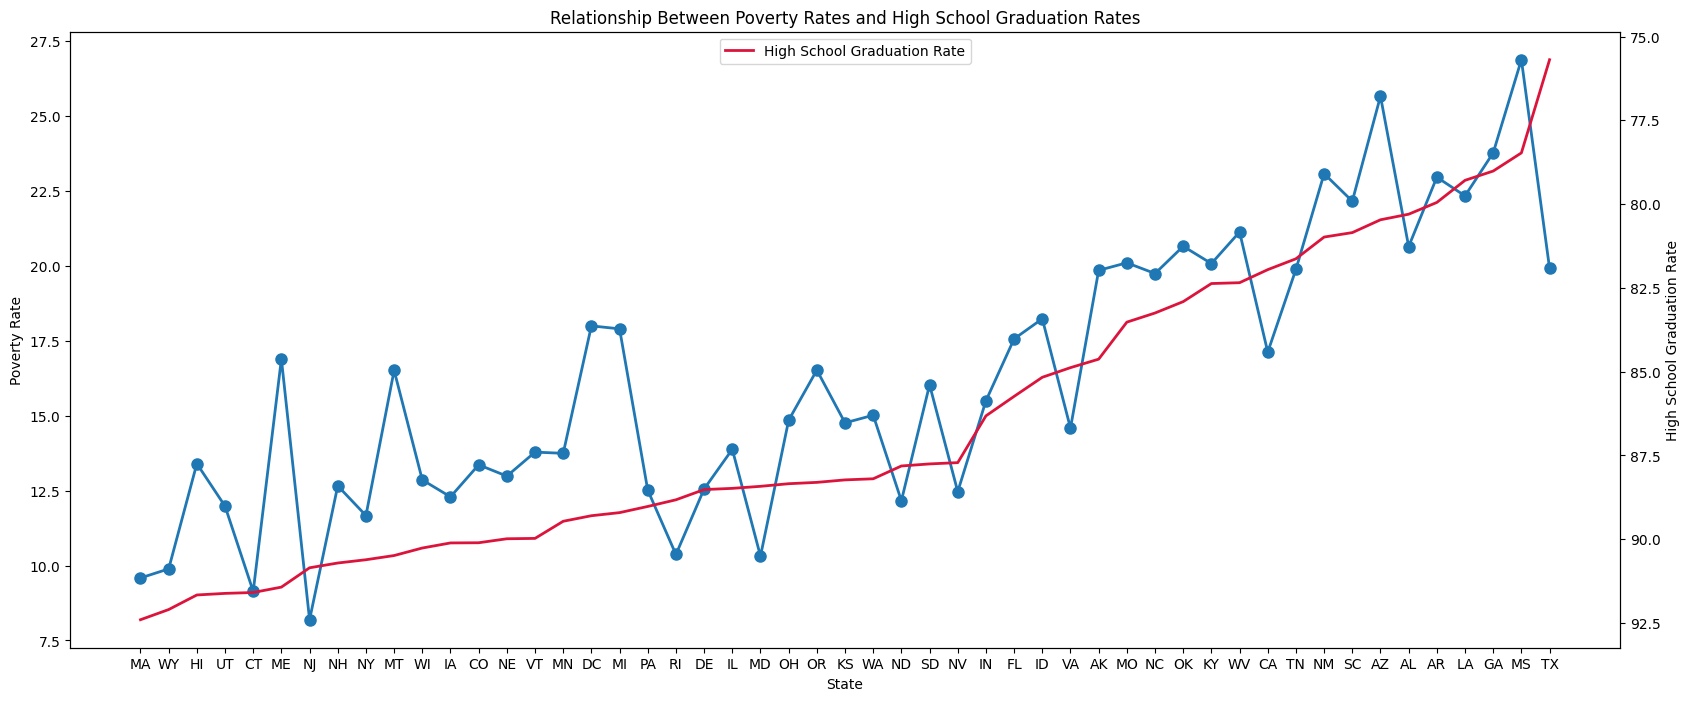

In [15]:
plt.figure(figsize=(20,8))
plt.title('Relationship Between Poverty Rates and High School Graduation Rates')

ax = plt.gca()
ax2 = ax.twinx()

ax.plot(merged_df['Geographic Area'], merged_df['poverty_rate'], label='Poverty Rate', linestyle='-', marker='o', markersize=8, linewidth=2)

ax2.plot(merged_df['Geographic Area'], merged_df['percent_completed_hs'], color='crimson', label='High School Graduation Rate', markersize=8, linewidth=2)

ax.set_ylabel('Poverty Rate')
ax.set_xlabel('State')
ax2.set_ylabel('High School Graduation Rate')

ax2.invert_yaxis()
plt.legend(loc='upper center')
ax.yaxis.grid(False)
ax2.grid(False)
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

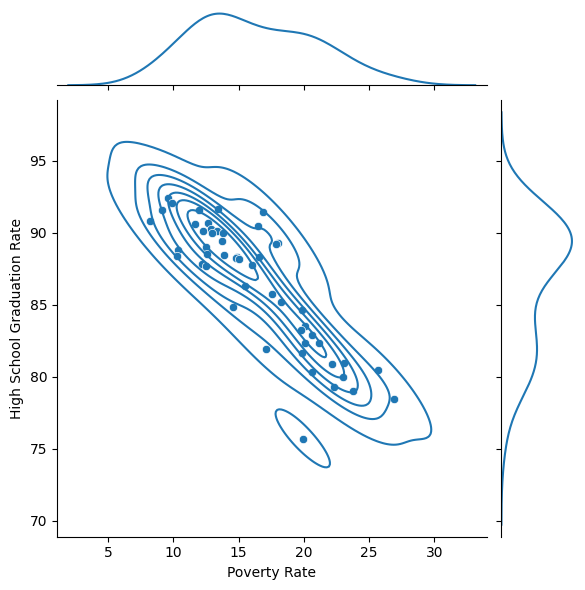

In [29]:
seaborn = sns.jointplot(x = "poverty_rate", y = "percent_completed_hs", data = merged_df, kind='kde', levels=8)
seaborn.plot_joint(sns.scatterplot)
plt.xlabel('Poverty Rate')
plt.ylabel('High School Graduation Rate')
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

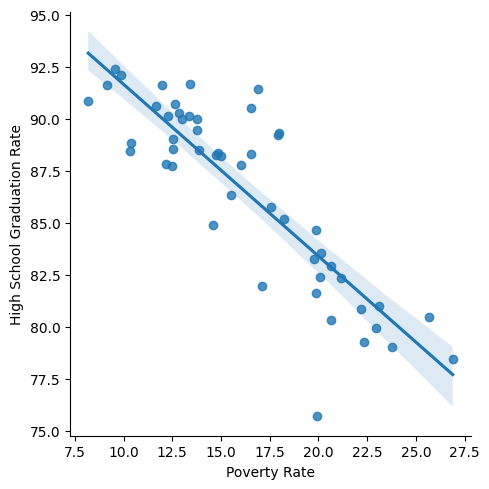

In [36]:
implot = sns.lmplot(data=merged_df, x="poverty_rate", y="percent_completed_hs")
plt.xlabel('Poverty Rate')
plt.ylabel('High School Graduation Rate')
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [41]:
columns = ['share_white', 'share_black','share_native_american', 'share_asian', 'share_hispanic']
df_share_race_city[columns] = df_share_race_city[columns].apply(pd.to_numeric, errors='coerce')
df_share_race_city.dropna(inplace=True)
racial_makeup = df_share_race_city.groupby('Geographic area')[columns].mean().reset_index()
racial_makeup.rename(columns={'share_white':'White', 'share_black':'Black', 'share_native_american':'Native American', 'share_hispanic':'Hispanic', 'share_asian': 'Asian'}, inplace=True)
racial_makeup

,Geographic area,White,Black,Native American,Asian,Hispanic
0,AK,45.65,0.57,45.86,1.39,2.15
1,AL,72.51,23.32,0.66,0.48,2.98
2,AR,78.45,16.30,0.76,0.48,4.27
3,AZ,59.93,0.95,28.59,0.73,20.14
4,CA,71.87,2.69,1.72,5.57,29.65
5,CO,87.77,0.92,1.62,1.15,17.90
6,CT,86.11,4.99,0.66,2.99,7.98
7,DC,38.50,50.70,0.30,3.50,9.10
8,DE,76.25,15.39,0.52,2.00,7.42
9,FL,78.67,13.37,0.46,1.62,16.53


In [45]:
# Calculate the total population of each state
racial_makeup['Total'] = racial_makeup['White'] + racial_makeup['Black'] + racial_makeup['Native American'] + racial_makeup['Asian'] + racial_makeup['Hispanic']

# Calculate the percentage of each race in each state
racial_makeup['White %'] = racial_makeup['White'] / racial_makeup['Total'] * 100
racial_makeup['Black %'] = racial_makeup['Black'] / racial_makeup['Total'] * 100
racial_makeup['Native American %'] = racial_makeup['Native American'] / racial_makeup['Total'] * 100
racial_makeup['Asian %'] = racial_makeup['Asian'] / racial_makeup['Total'] * 100
racial_makeup['Hispanic %'] = racial_makeup['Hispanic'] / racial_makeup['Total'] * 100

# Drop the 'Total' column
racial_makeup = racial_makeup.drop('Total', axis=1)

# Create the bar chart with the correct percentages
fig = px.bar(racial_makeup,
    x="Geographic area",
    y=['White %', 'Black %', 'Native American %', 'Asian %', 'Hispanic %'],
    title="Racial Makeup of Each US State",
    labels={"value": "Racial Makeup (%)", 'variable': 'Race', 'Geographic area': 'State'},
    barmode="stack",
)
fig.update_xaxes(tickangle=0)
fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [47]:
death_by_race = df_fatalities['race'].value_counts()
death_by_race

,count
race,
W,1201
B,618
H,423
A,39
N,31
O,28


In [51]:
fig = px.pie(labels=death_by_race.index, values=death_by_race.values,
             title="Precentage of Deaths by Police %", names=death_by_race.index, hole=0.6)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [49]:
death_by_sex = df_fatalities['gender'].value_counts()
death_by_sex

,count
gender,
M,2428
F,107


In [53]:
fig = px.pie(labels=death_by_sex.values, values=death_by_sex.values,
             title="Sex of Police Deaths Comparison", names=death_by_sex.index)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [56]:
age_and_manner_of_death = df_fatalities[df_fatalities['age'].notna()].copy()
age_and_manner_of_death = age_and_manner_of_death.groupby('gender')[['age', 'manner_of_death']].value_counts().reset_index(name='count')
age_and_manner_of_death.loc[:, 'gender'] = age_and_manner_of_death['gender'].replace({'M': 'Man', 'F': 'Woman'})
age_and_manner_of_death

,gender,age,manner_of_death,count
0,Woman,25.00,shot,6
1,Woman,50.00,shot,5
2,Woman,24.00,shot,4
3,Woman,27.00,shot,4
4,Woman,31.00,shot,4
...,...,...,...,...
166,Man,70.00,shot and Tasered,1
167,Man,76.00,shot and Tasered,1
168,Man,79.00,shot,1
169,Man,80.00,shot,1


In [58]:
box_plot = px.box(age_and_manner_of_death, x="manner_of_death", y="age", color="gender", title="Manner of Death compared to Age of Individual", color_discrete_map={'Woman': 'red', 'Man': 'blue'})
box_plot.update_layout(xaxis_title="Manner of Death", yaxis_title="Age of Individual")
box_plot.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [59]:
unarmed_armed = df_fatalities[df_fatalities['armed'].notna()]
unarmed_count = (unarmed_armed['armed'] == 'unarmed').sum()
total_count = unarmed_armed['armed'].value_counts().sum()
unarmed_percent = (unarmed_count / total_count) * 100

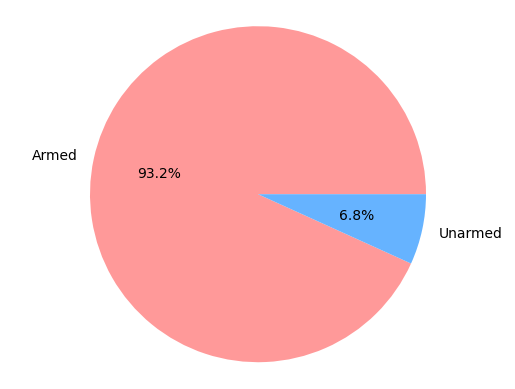

In [61]:
labels = ['Armed', 'Unarmed']
sizes = [total_count - unarmed_count, unarmed_count]
colors = ['#ff9999', '#66b3ff']

plt.pie(sizes, labels=labels, colors=colors, autopct=lambda p: '{:.1f}%'.format(p))
plt.axis('equal')
plt.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [99]:
df_fatalities_clean = df_fatalities[df_fatalities['age'].notna()]
df_fatalities_clean['Under 25'] = np.where(df_fatalities_clean.age < 25, 'No', 'Yes')
df_fatalities_clean['Under 25'].value_counts()
precentage_of_young_deaths = (df_fatalities_clean['Under 25'] == 'No').sum()
total_deaths = len(df_fatalities_clean)
young_death_percent = (precentage_of_young_deaths / total_deaths) * 100
print(f'The Percent of under 25 deaths is {round(young_death_percent, 1)} %.')

The Percent of under 25 deaths is 18.3 %.


<ipython-input-99-57c0a966952a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

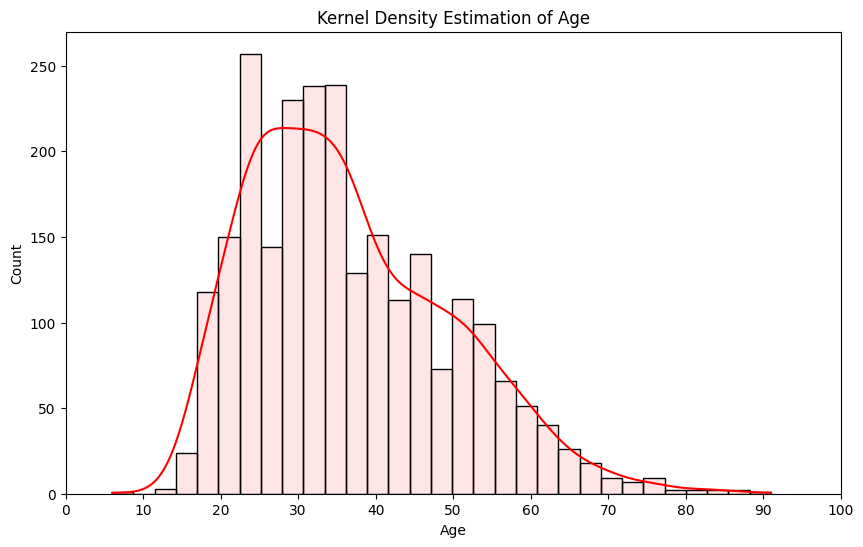

In [100]:
plt.figure(figsize=(10, 6))

sns.histplot(df_fatalities_clean, x='age', kde=True, color='red', alpha=0.1)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Kernel Density Estimation of Age')
plt.xticks(range(0, 101, 10))

plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

In [108]:
df_fatalities_clean['race'] = df_fatalities_clean['race'].replace({'W': 'White', 'B': 'Black', 'A': 'Asian', 'H': 'Hispanic', 'N': 'Native American', 'O': 'Other'})
df_fatalities_clean = df_fatalities_clean.dropna(subset=['race'], axis=0)

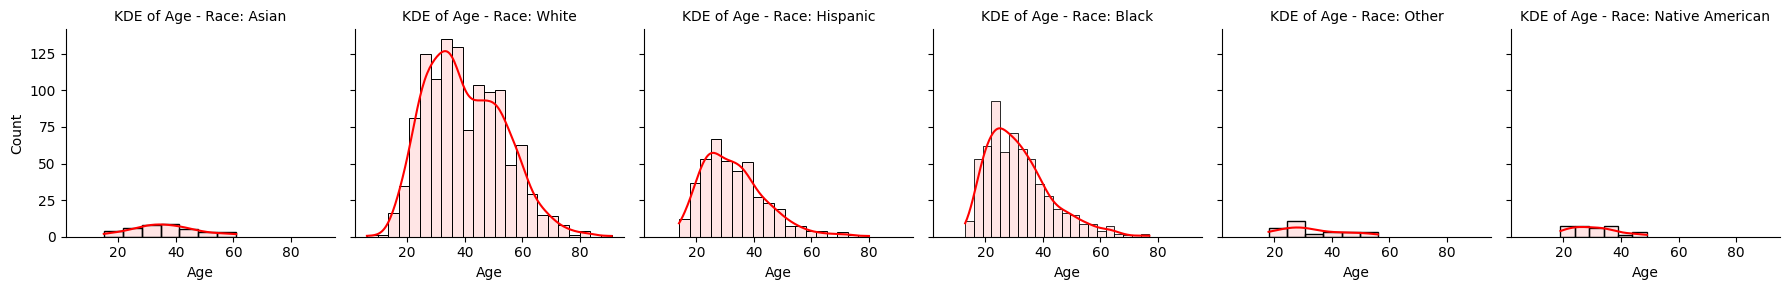

In [113]:
g = sns.FacetGrid(df_fatalities_clean, col="race")
g.map(sns.histplot, 'age', kde=True, color='red', alpha=0.1)

g.set_axis_labels('Age', 'Count')
g.set_titles('KDE of Age - Race: {col_name}')

plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [130]:
killed_by_race = df_fatalities_clean[df_fatalities_clean['race'].notna()]
killed_by_race = killed_by_race['race'].value_counts()

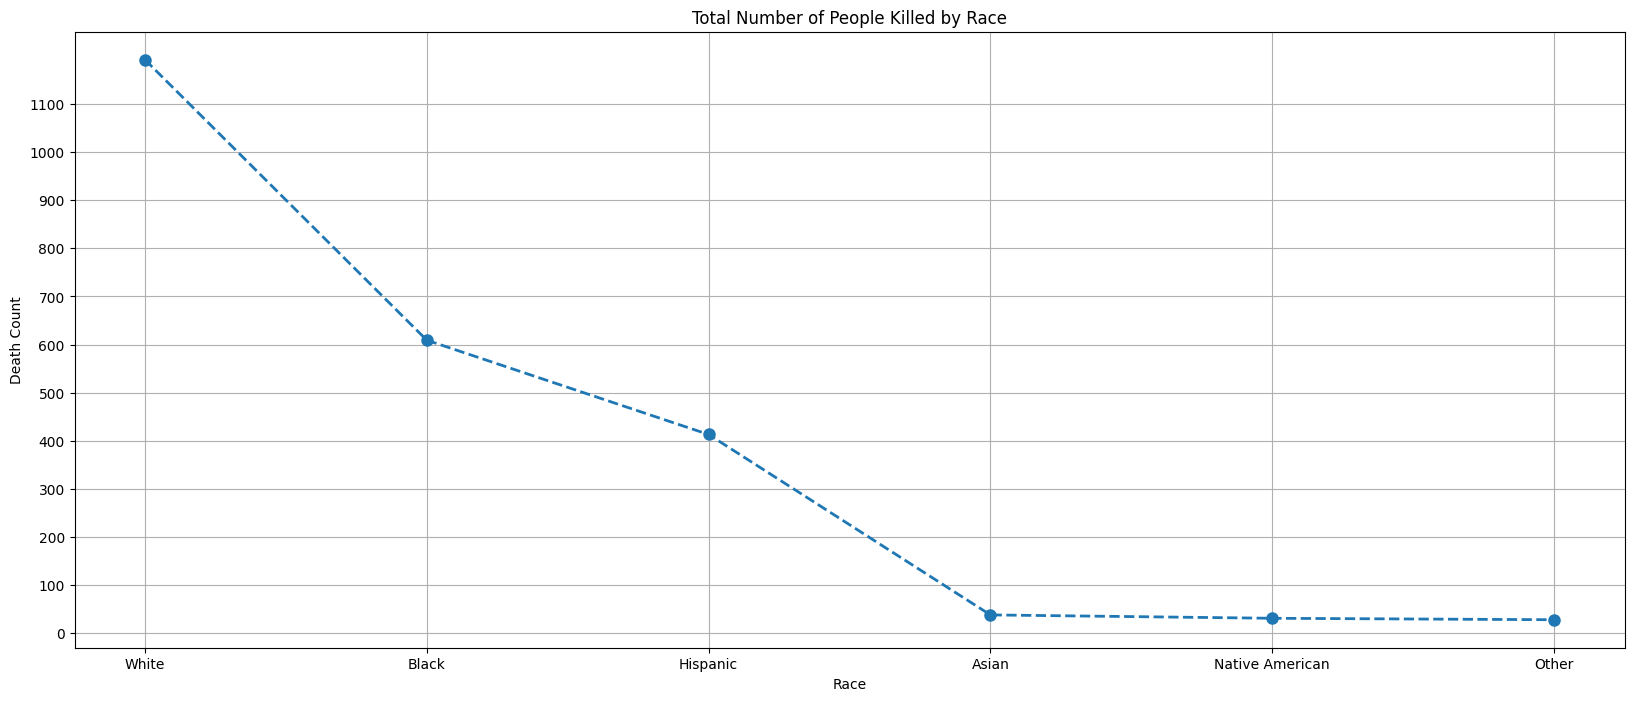

In [156]:
plt.figure(figsize=(20, 8))
plt.plot(killed_by_race, linestyle='--', marker='o', markersize=8, linewidth=2)
plt.xlabel("Race")
plt.ylabel("Death Count")
plt.title("Total Number of People Killed by Race")
plt.grid(True)
plt.yticks(range(0, killed_by_race.max(), 100))
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [157]:
signs_of_mental_ilness = df_fatalities['signs_of_mental_illness'].value_counts()
mental_ilness = signs_of_mental_ilness[True].sum()  # Corrected line
total_deaths_number = len(df_fatalities)  # Changed line
mental_ilness_precentage = (mental_ilness / total_deaths_number) * 100  # Corrected line
print(f'The Percentage of deaths with signs of mental illness is {round(mental_ilness_precentage, 1)} %.')

The Percentage of deaths with signs of mental illness is 25.0 %.


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [158]:
top_10_cities = df_fatalities[['state', 'city']].value_counts().head(10).reset_index(name='count')

In [159]:
fig = px.bar(top_10_cities, x='city', y='count')

fig.update_layout(
    title="Top 10 Cities by Death Count",
    xaxis_title="City",
    yaxis_title="Death Count",
    showlegend=False
)

fig.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

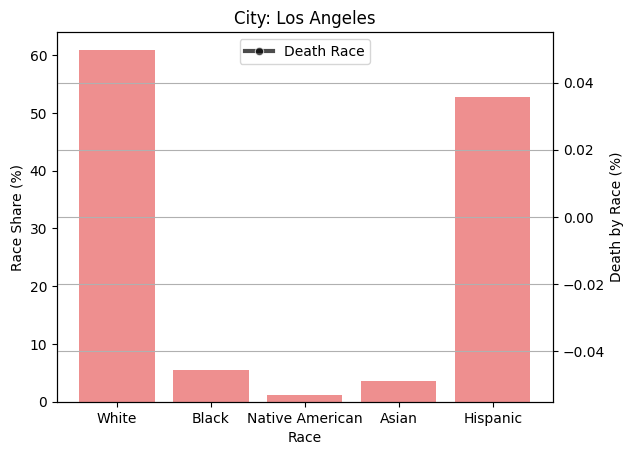

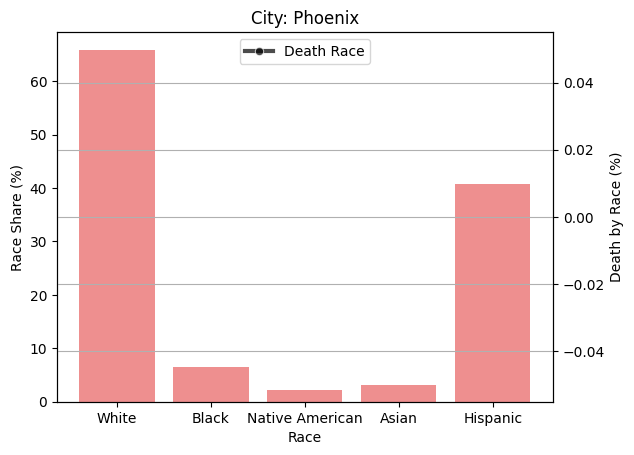

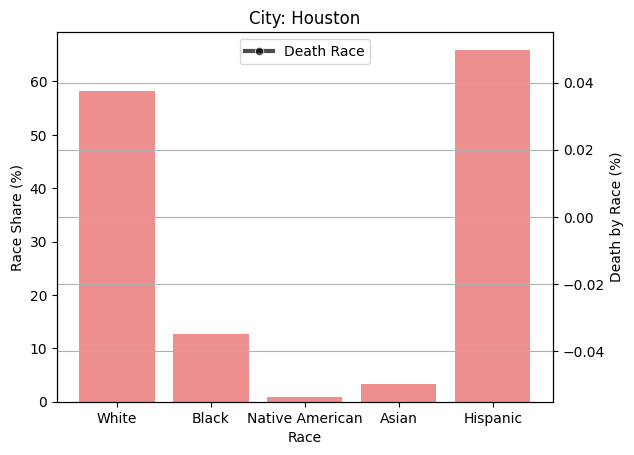

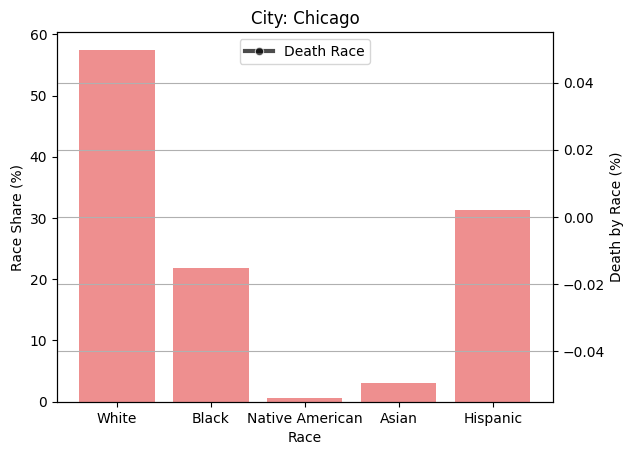

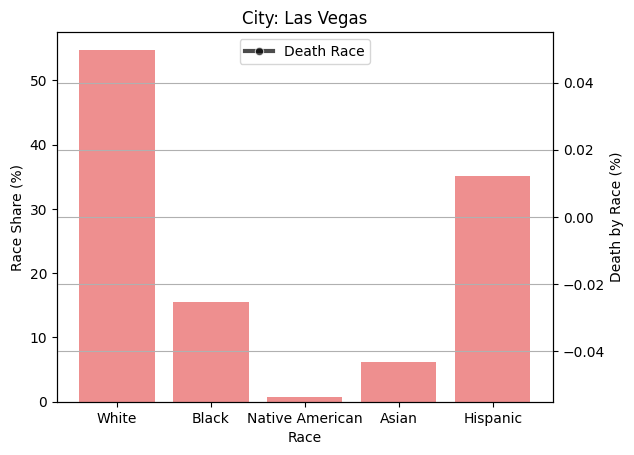

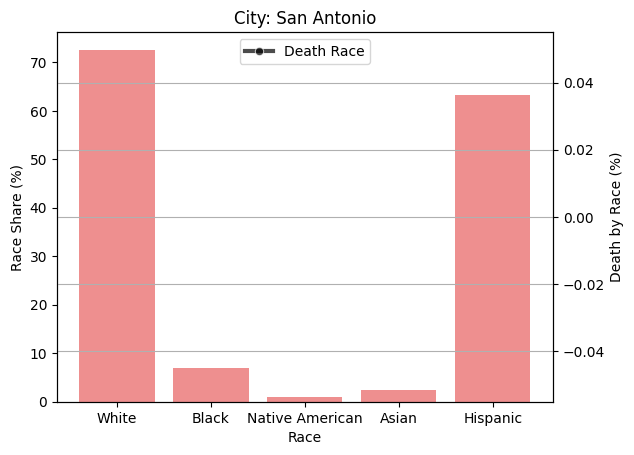

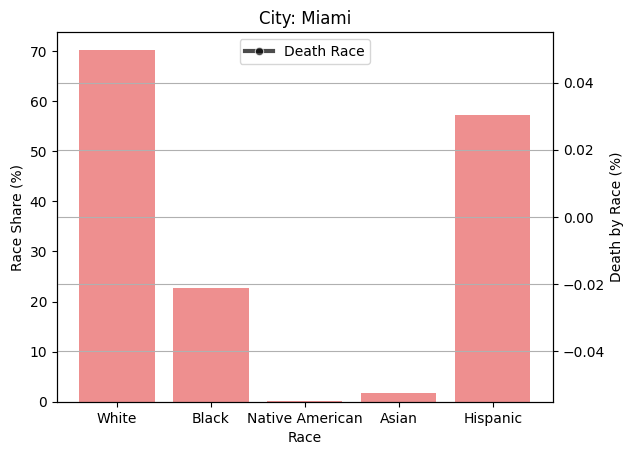

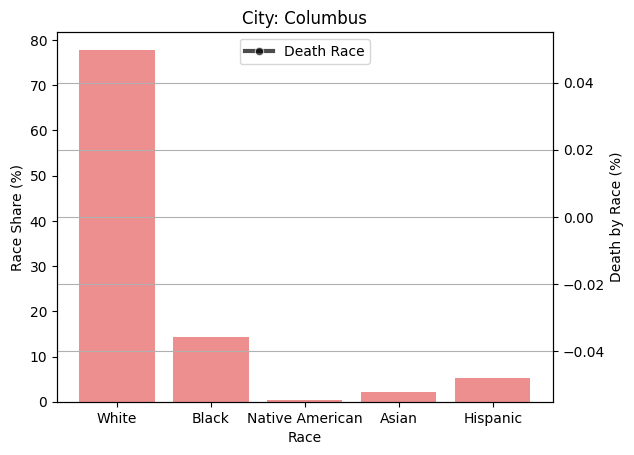

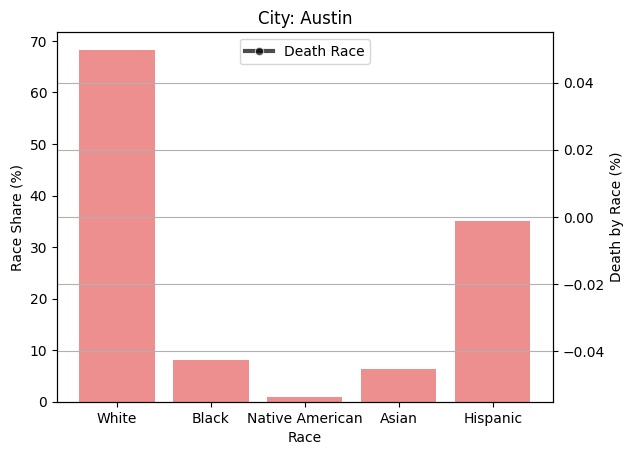

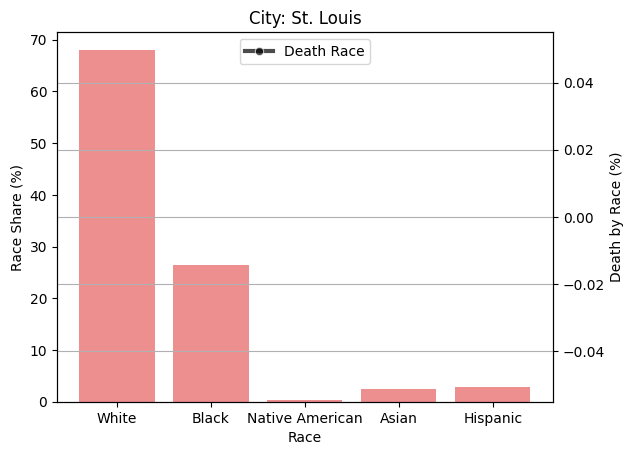

In [163]:
merged_df = top_10_cities.merge(df_fatalities, on=['state', 'city'])
merged_df = merged_df.groupby(['state', 'city', 'count'])['race'].value_counts(dropna=False).reset_index(name='death_race')
merged_df['death_race'] = round((merged_df['death_race'] / merged_df['count']) * 100)
merged_df = merged_df[merged_df['race'].isin(["Asian", "Black", "Hispanic", "Native American", "White"])]
cities = '|'.join(top_10_cities['city'].tolist())
top10_cities_race = df_share_race_city[df_share_race_city['City'].str.contains(cities, case=False)]
for city in top_10_cities['city']:
    city_variation = top10_cities_race['City'].str.contains(city, case=False)
    top10_cities_race.loc[city_variation, 'City'] = city
top10_cities_race = top10_cities_race.groupby(['Geographic area', 'City']).mean().reset_index()
top10_cities_race = top10_cities_race.merge(top_10_cities, left_on=['Geographic area', 'City'], right_on=['state', 'city'])
top10_cities_race.drop(['Geographic area', 'City', 'count'], axis=1, inplace=True)
melted_df = top10_cities_race.melt(id_vars=["state", "city"], var_name="race", value_name="race_share")
race_mapping = {
    "share_white": "White",
    "share_black": "Black",
    "share_native_american": "Native American",
    "share_asian": "Asian",
    "share_hispanic": "Hispanic"
}
melted_df['race'] = melted_df['race'].replace(race_mapping)
for city in top_10_cities['city']:

    fig, ax = plt.subplots()

    sns.barplot(data=melted_df[melted_df['city'] == city], x='race', y='race_share', ax=ax, color='red', alpha=0.5)
    ax2 = ax.twinx()
    sns.lineplot(data=merged_df[merged_df['city'] == city], x='race', y='death_race', ax=ax2, color='black', alpha=0.7, marker='o', linewidth=3, label='Death Race')
    ax2.grid(None)

    ax.set_xlabel("Race")
    ax.set_ylabel("Race Share (%)")
    ax2.set_ylabel("Death by Race (%)")

    plt.legend(loc='upper center')
    plt.title(f'City: {city}')
    plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [164]:
deaths_by_state = df_fatalities.groupby('state')['id'].count().reset_index(name='count')
fig = px.choropleth(deaths_by_state, locations='state', color='count', locationmode="USA-states", scope="usa", title='Police Killings by US State', color_continuous_scale='Reds')
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [165]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])
deaths_over_time = df_fatalities.groupby('date').size().reset_index(name='count').sort_values('date')
deaths_over_time['year'] = deaths_over_time['date'].dt.year
deaths_over_time['month'] = deaths_over_time['date'].dt.month
deaths_over_time = deaths_over_time.groupby(['year', 'month'])['count'].sum().reset_index()
deaths_over_time

<ipython-input-165-22d50aa61eb6>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,year,month,count
0,2015,1,70
1,2015,2,78
2,2015,3,87
3,2015,4,88
4,2015,5,85
5,2015,6,68
6,2015,7,85
7,2015,8,86
8,2015,9,90
9,2015,10,89


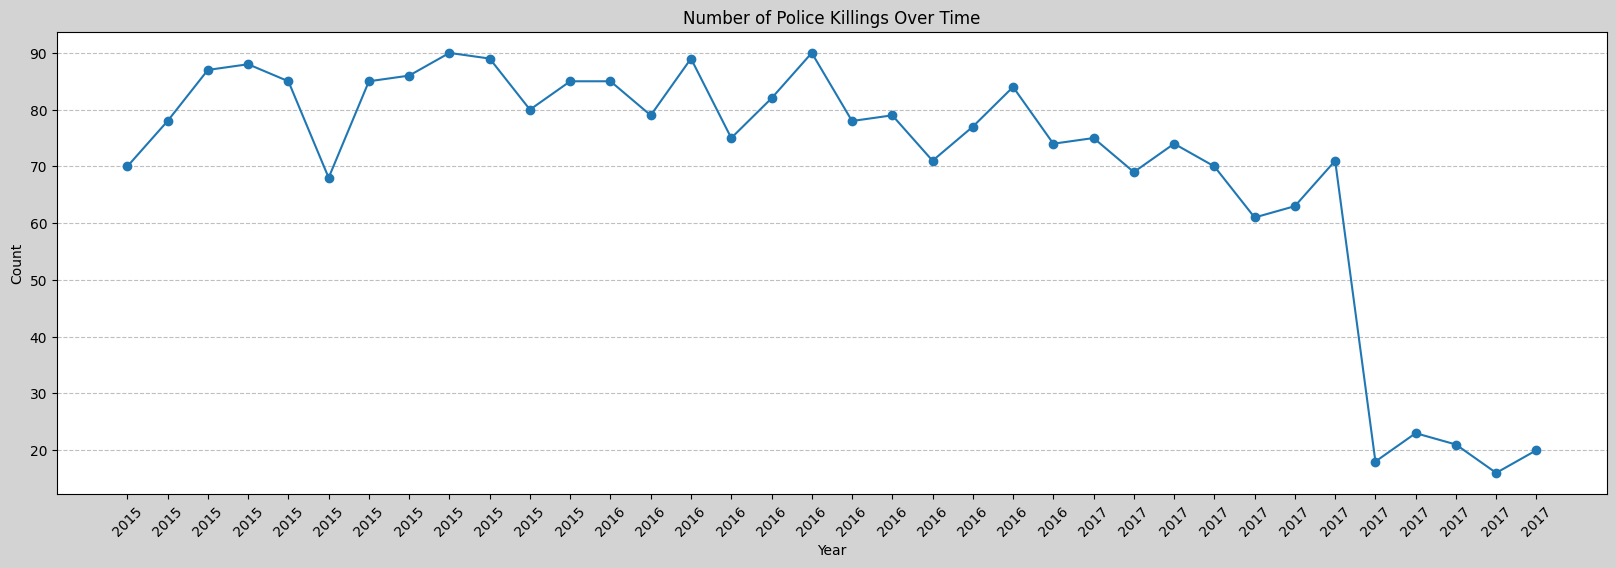

In [168]:
plt.figure(figsize=(20, 6), facecolor='lightgray')

plt.plot(deaths_over_time.index, deaths_over_time['count'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Police Killings Over Time')
plt.grid(axis='y', linestyle='--', alpha=0.8)


plt.xticks(deaths_over_time.index, deaths_over_time.year, rotation=45)

plt.show()